<a href="https://colab.research.google.com/github/Shashank-u803/Machine-Learning-Lab/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Linear and Multi-Linear Regression algorithm using appropriate dataset.<br>

You need to implement Linear and Multilinear regression methods with <br>
i. Using library and <br>
ii.Without using library<br>

Predict canada's per capita income in year 2020. Use the data file
canada_per_capita_income.csv file. <br> If required, apply the necessary
data processing steps. Using this build a regression model and
predict the per capita income for canadian citizens in year 2020

In [3]:
import pandas as pd

df = pd.read_csv("/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


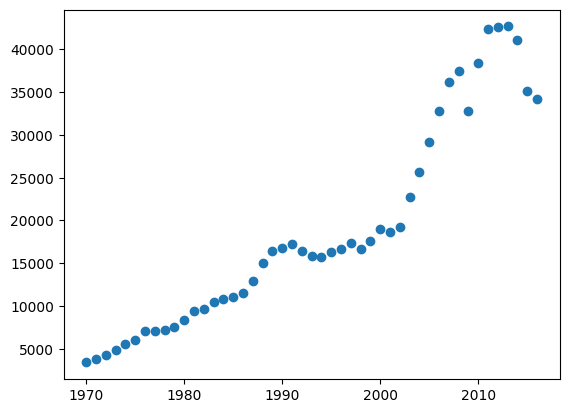

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['year'], df['per capita income (US$)'])

In [7]:
# using the library
from sklearn.linear_model import LinearRegression

X = df[['year']]
y = df['per capita income (US$)']

model = LinearRegression()
model.fit(X, y)

pred_2020 = model.predict(pd.DataFrame({'year': [2020]}))
print("Linear Regression (library) prediction for 2020:", pred_2020[0])

Linear Regression (library) prediction for 2020: 41288.69409441762


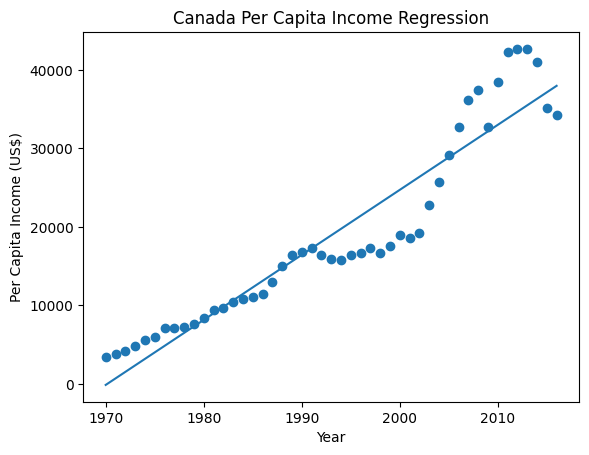

In [8]:
y_pred = model.predict(X)

# Plot
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Canada Per Capita Income Regression")
plt.show()

In [12]:
#without using library
import numpy as np
df['year_sq'] = df['year'] ** 2
X = df[['year', 'year_sq']].values
y = df['per capita income (US$)'].values

X_b = np.c_[np.ones((len(X), 1)), X]

theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

x_2020 = np.array([1, 2020, 2020**2])
pred = x_2020 @ theta

print("Multi-linear prediction: (without library) ", pred)

Multi-linear prediction: (without library)  48993.85088224709


Predict Salary of the employee. Use the data file salary.csv file. If
required, apply the necessary data processing steps. Using this build
a regression model and predict the salary of the employee with 12
years of experience.

In [15]:
import pandas as pd

df2 = pd.read_csv("/salary.csv")
print("No of null values:\n", df2.isnull().sum())
df2.head()

No of null values:
 YearsExperience    2
Salary             0
dtype: int64


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [16]:
df2 = df2.dropna()
print("No of null values:\n", df2.isnull().sum())
df2.head()

No of null values:
 YearsExperience    0
Salary             0
dtype: int64


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [18]:
#With library
from sklearn.linear_model import LinearRegression

X = df2[['YearsExperience']]
y = df2['Salary']

model = LinearRegression()
model.fit(X, y)

#Prediction
pred_salary = model.predict(pd.DataFrame({'YearsExperience':[12]}))
print("Predicted Salary:", pred_salary[0])

Predicted Salary: 139049.6749539778


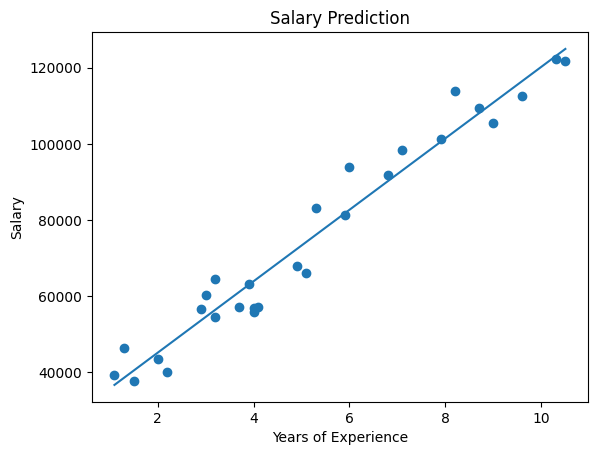

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction")
plt.show()

In [20]:
#without library
# Input and output
import numpy as np
X = df2[['YearsExperience']].values
y = df2['Salary'].values

# Add bias column (for intercept)
X_b = np.c_[np.ones((len(X), 1)), X]

# Normal Equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Intercept:", theta[0])
print("Slope:", theta[1])

# Prediction for 12 years experience
pred_salary = np.array([1, 12]) @ theta
print("Predicted Salary:", pred_salary)

Intercept: 26265.98773185526
Slope: 9398.640601843546
Predicted Salary: 139049.6749539778


Considering the data file hiring.csv. The file contains hiring statics for a firm such as experience of candidate,
his written test score and personal interview score. <br>  Based on these 3 factors, HR will decide the salary. <br> Given
this data, you need to build a Multiple Linear Regression model for HR department that can help them
decide salaries for future candidates. <br>  Using this predict salaries for following candidates,
. 2 yr experience, 9 test score, 6 interview score
· 12 yr experience, 10 test score, 10 interview score

Note: If required, apply the necessary data processing steps to data files.

In [26]:
import pandas as pd

df = pd.read_csv("/hiring.csv")

# convert word numbers to digits
word_to_num = {
    'zero':0,'one':1,'two':2,'three':3,'four':4,
    'five':5,'six':6,'seven':7,'eight':8,
    'nine':9,'ten':10,'eleven':11,'twelve':12
}

df['experience'] = df['experience'].replace(word_to_num)

# fill missing values
df['experience'] = df['experience'].fillna(df['experience'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(
    df['test_score(out of 10)'].median()
)

df.head(10)

/tmp/ipython-input-2896354631.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(word_to_num)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [29]:
#with library
from sklearn.linear_model import LinearRegression

X = df[['experience',
        'test_score(out of 10)',
        'interview_score(out of 10)']]

y = df['salary($)']

model = LinearRegression()
model.fit(X, y)

# Predictions
p1 = model.predict(pd.DataFrame({
    'experience': [2],
    'test_score(out of 10)': [9],
    'interview_score(out of 10)': [6]
}))

p2 = model.predict(pd.DataFrame({
    'experience': [12],
    'test_score(out of 10)': [10],
    'interview_score(out of 10)': [10]
}))

print("Salary prediction 1:", p1[0])
print("Salary prediction 2:", p2[0])


Salary prediction 1: 47056.91056910569
Salary prediction 2: 88227.64227642278


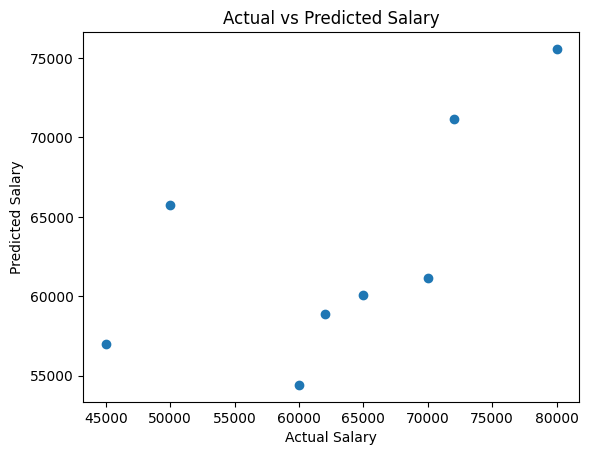

In [30]:
import matplotlib.pyplot as plt

# predictions for training data
y_pred = model.predict(X)

# plot
plt.scatter(y, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In [28]:
#without library
import numpy as np

X = df[['experience',
        'test_score(out of 10)',
        'interview_score(out of 10)']].values

y = df['salary($)'].values

# add bias column
X_b = np.c_[np.ones((len(X), 1)), X]

# normal equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# predictions
cand1 = np.array([1, 2, 9, 6])
cand2 = np.array([1, 12, 10, 10])

p1 = cand1 @ theta
p2 = cand2 @ theta

print("Salary prediction 1:", p1)
print("Salary prediction 2:", p2)

Salary prediction 1: 47056.91056910592
Salary prediction 2: 88227.64227642337


Considering the data file 1000_companies.csv.<br> The file contains profit statics for a firm such as R&D Spend,
Administration, Marketing Spend and State. <br> Based on these four factors build a Multiple Linear Regression
model to predict the profit. Using this predict profit for following,
. 91694.48 R&D Spend, 515841.3 Administration, 11931.24 Marketing Spend, Florida State

In [32]:
import pandas as pd

df4 = pd.read_csv("/1000_Companies.csv")
df4

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [33]:
df4 = pd.get_dummies(df4, columns=['State'], drop_first=True)
print("No of null values:\n", df4.isnull().sum())

No of null values:
 R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64


In [36]:
print(df4.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


In [38]:
#with library
from sklearn.linear_model import LinearRegression

X = df4.drop('Profit', axis=1)
y = df4['Profit']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [39]:
pred = model.predict(pd.DataFrame({
    'R&D Spend':[91694.48],
    'Administration':[515841.3],
    'Marketing Spend':[11931.24],
    'State_Florida':[1],
    'State_New York':[0]
}))

print("Predicted Profit:", pred[0])

Predicted Profit: 510570.9926108309


In [43]:
#without library
import numpy as np

X = df4.drop('Profit', axis=1).values.astype(float)
y = df4['Profit'].values.astype(float)
X_b = np.c_[np.ones((len(X), 1)), X]

theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

x_new = np.array([1, 91694.48, 515841.3, 11931.24, 1, 0])

pred = x_new @ theta
print("Predicted Profit:", pred)

Predicted Profit: 510570.9926108045


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


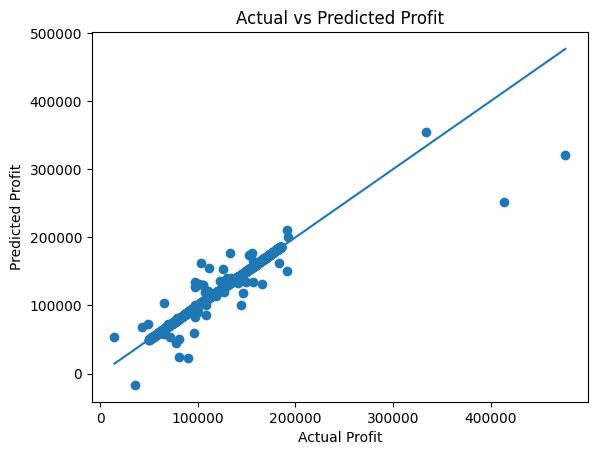

In [45]:
y_pred = model.predict(X)

import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()],
         [y.min(), y.max()])

plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()


In [46]:
print(len(y))
print(len(y_pred))

1000
1000
